<a href="https://colab.research.google.com/github/skhazaei/TensorFlow-repo/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Fashion MNIST Data

In [63]:
import tensorflow as tf
from tensorflow import keras

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Print the first test image to see how it looks like

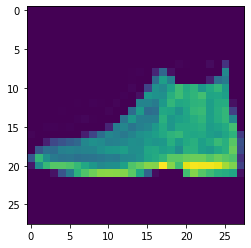

In [64]:
import matplotlib.pyplot as plt
image = plt.imshow(test_images[0])

How about its value? and label?

In [65]:
import numpy as np

np.set_printoptions(linewidth=200)
print (test_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3   1   0   0   7   0  37   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   2   0  27  84  11   

In [66]:
print ('training label images {} = {}'.format(10, training_labels[10]))

training label images 10 = 0


# Normalizing the values

In [67]:
training_images = training_images / 255.0
test_images = test_images /255.0

# Define the model

In [68]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

**Dense**: Adds a layer of neurons
Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding! 

**why the number of neurans at last layer are set to 10?** the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

#Compile the model

In [69]:
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model

In [70]:
model.fit(training_images, training_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6308 - accuracy: 0.7804
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3842 - accuracy: 0.8602
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3358 - accuracy: 0.8775
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3187 - accuracy: 0.8825
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2983 - accuracy: 0.8877


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.9098. This tells you that your neural network is about 91% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

# Evaluate model on unseen data

In [71]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3501 - accuracy: 0.8720


[0.35011550784111023, 0.871999979019165]

That returned an accuracy of about .8838, which means it was about 88% accurate. As expected it probably would not do as well with *unseen* data as it did with data it was trained on! 

# Create a set of classifications for each of the test images

In [72]:
classifications = model.predict(test_images)

# Print the classification result of model for the first test image

In [73]:
print (classifications[0])

[1.4785472e-04 1.5487831e-08 2.7331846e-06 1.3172844e-07 1.8242287e-06 6.7364289e-03 8.3361323e-05 9.9073639e-03 2.3414057e-05 9.8309684e-01]


Let's check the label of second test image

In [74]:
print (test_labels[0])

9


The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value (https://github.com/zalandoresearch/fashion-mnist#labels), i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. Notice that they are all VERY LOW probabilities.

For the 9 (Ankle boot), the probability was in the 90's. The 10th element on the list of classifications output is the biggest, and the ankle boot is labelled 9